## Building neural network with tensorflow



In [1]:
from numpy import argmax
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets
import matplotlib.pyplot as plt


In [2]:
np.random.seed(1234)
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Print the features (column names) of the dataset
print("Features:", iris.feature_names)

# Print the target names (class labels) of the dataset
print("Target names:", iris.target_names)

# Print the first 5 rows of the data
print("First 5 rows of the data:")
print(iris.data[:5])

# Print the corresponding target values for the first 5 rows
print("Target values for the first 5 rows:")
print(iris.target[:5])

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 rows of the data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target values for the first 5 rows:
[0 0 0 0 0]


In [4]:
## answer 2a

# Preprocess the data (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


Split the data into training and testing sets at a ratio of $8:2$.


Consider three models:

- `model_A`: 1 dense layer (`relu`) with 3 units, followed by 1 dense layer (`softmax`)
- `model_B`: 1 dense layer (`relu`) with 10 units, followed by 1 dense layer (`softmax`)
- `model_C`: 2 dense layers (`relu`) with 10 units and then 8 units, followed by 1 dense layer (`softmax`)

We fix the model configurations:
`epoch = 150`,  `batch_size=10`, `loss="sparse_categorical_corssentropy"` and `metrics = ['accuracy']`.

Use the `adam` optimizer and batch normalization.

Train each model using the training set $10$ times. Which model gives the highest average test accuracy?

In [5]:
from keras.models import Sequential
from keras.layers import Dense


input_shape = X_train.shape[1]
output_shape = len(np.unique(y))

# define the model_A
model_A = Sequential()
model_A.add(Dense(units=3, activation='relu', input_shape=(input_shape,)))
model_A.add(Dense(units=output_shape, activation='softmax'))

# define the model_B
model_B = Sequential()
model_B.add(Dense(units=10, activation='relu', input_shape=(input_shape,)))
model_B.add(Dense(units=output_shape, activation='softmax'))

# define the model_C
model_C = Sequential()
model_C.add(Dense(units=10, activation='relu', input_shape=(input_shape,)))
model_C.add(Dense(units=8, activation='relu'))
model_C.add(Dense(units=output_shape, activation='softmax'))


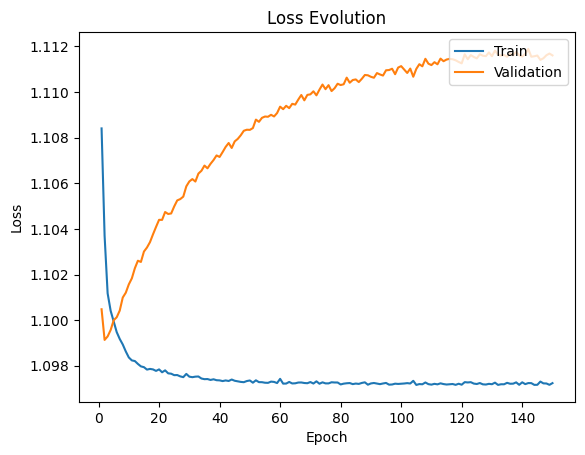

In [6]:
from keras.callbacks import History  # Import History callback

history = History()


model = model_A

model.compile(optimizer='adam',
            loss="sparse_categorical_crossentropy",
            metrics = ['accuracy'])

model.fit(X_train, y_train, 
            epochs=150, 
            batch_size=10, 
            validation_data=(X_test, y_test), 
            validation_split=0.1,
            verbose=0,
            callbacks=[history],)

loss, acc = model.evaluate(X_test, y_test, verbose=0)


# print loss evolution
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()


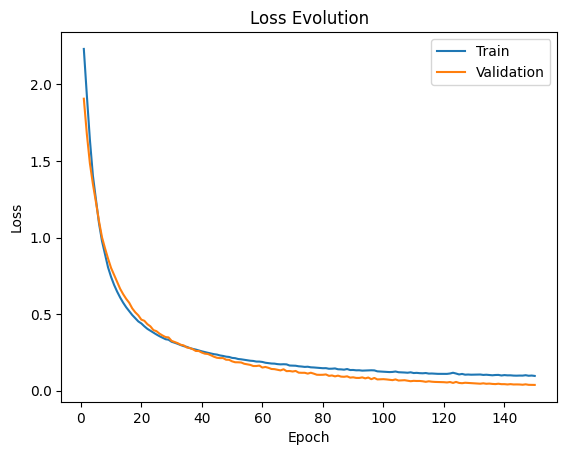

In [7]:
from keras.callbacks import History  # Import History callback

history = History()


model = model_C

model.compile(optimizer='adam',
            loss="sparse_categorical_crossentropy",
            metrics = ['accuracy'])

model.fit(X_train, y_train, 
            epochs=150, 
            batch_size=10, 
            validation_data=(X_test, y_test), 
            validation_split=0.1,
            verbose=0,
            callbacks=[history],)

loss, acc = model.evaluate(X_test, y_test, verbose=0)


# print loss evolution
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()


Now we try to explore the performance of model A, B and C. 

In [8]:
from keras.models import Sequential
from keras.layers import Dense


input_shape = X_train.shape[1]
output_shape = len(np.unique(y))

# define the model_A
def build_model_A():
    model_A = Sequential()
    model_A.add(Dense(units=3, activation='relu', input_shape=(input_shape,)))
    model_A.add(Dense(units=output_shape, activation='softmax'))
    return model_A

# define the model_B
def build_model_B():
    model_B = Sequential()
    model_B.add(Dense(units=10, activation='relu', input_shape=(input_shape,)))
    model_B.add(Dense(units=output_shape, activation='softmax'))
    return model_B

# define the model_C
def build_model_C():
    model_C = Sequential()
    model_C.add(Dense(units=10, activation='relu', input_shape=(input_shape,)))
    model_C.add(Dense(units=8, activation='relu'))
    model_C.add(Dense(units=output_shape, activation='softmax'))
    return model_C


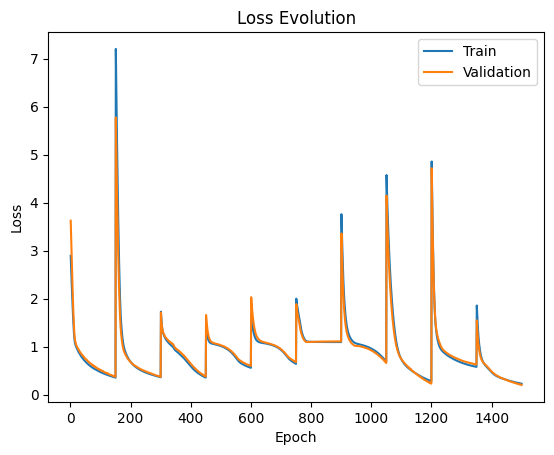

Test for <keras.src.engine.sequential.Sequential object at 0x000001B2CF2C5600>:
Total number of runs: 10
Average test Accuracy: 0.790


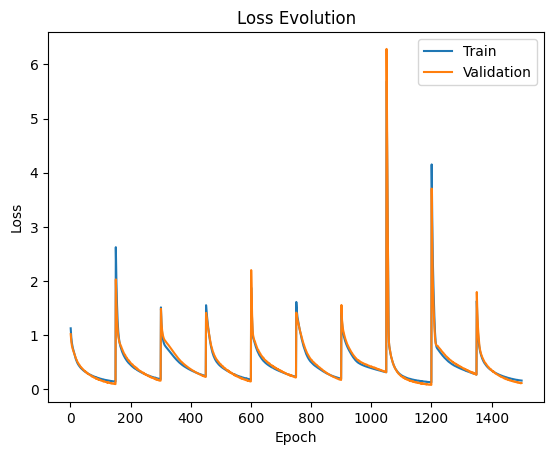

Test for <keras.src.engine.sequential.Sequential object at 0x000001B2D2B7E8C0>:
Total number of runs: 10
Average test Accuracy: 1.000


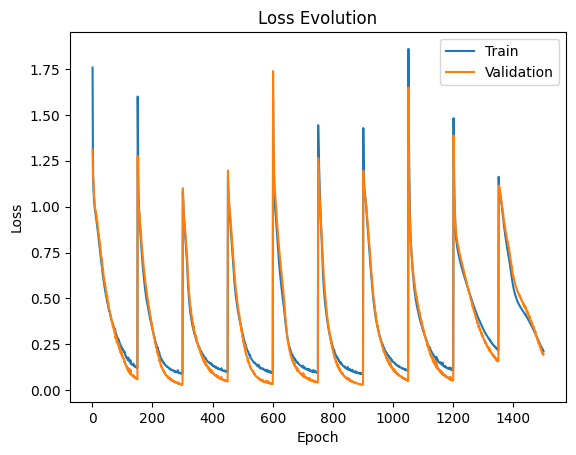

Test for <keras.src.engine.sequential.Sequential object at 0x000001B2D287F460>:
Total number of runs: 10
Average test Accuracy: 1.000


In [9]:
# write a function that pass a series of command that defines compile, train, fit, evaluate for any models
from keras.callbacks import History  # Import History callback

def test_accuracy_of_model(build_model):

    
    # fit the model 10 times and take the average of the accuracy
    accuaracy = 0
    num_of_run = 0
    history = History()
    
    for _ in range(10):
        model = build_model()
        
        model.compile(optimizer='adam',
                    loss="sparse_categorical_crossentropy",
                    metrics = ['accuracy'])
        
        model.fit(X_train, y_train, 
                  epochs=150, 
                  batch_size=10, 
                  validation_data=(X_test, y_test), 
                  validation_split=0.1,
                  verbose=0,
                  callbacks=[history],)
        
        loss, acc = model.evaluate(X_test, y_test, verbose=0)

        accuaracy += acc
        num_of_run += 1
    acc = accuaracy/num_of_run

    # print loss evolution
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the loss values
    ax.plot(range(1, len(loss_values) + 1), loss_values)
    ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Set the plot title and labels
    ax.set_title('Loss Evolution')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')

    # Show the plot
    plt.show()

    print(f'Test for {model}:')
    print(f'Total number of runs: {num_of_run}')
    print('Average test Accuracy: %.3f' % acc)

test_accuracy_of_model(build_model_A)
test_accuracy_of_model(build_model_B)
test_accuracy_of_model(build_model_C)

## Discussion

1. Model A reach local optimal solution and stop further learning
2. Model B performs better but the performance is still not stable
3. Model C obtains satisfactory validation loss and test accuracy 